# Regresión de dos formas

Sigamos profundizando en estos datos.
Se creo un dataframe de Pandas y se hicieron pruebas con parte del conjunto de datos original, estandarizando el precio de la fanega. Haciéndolo, sólo se reunio alrededor de 400 puntos de datos y sólo para los meses de otoño.

Los datos están precargados con un gráfico de dispersión inicial para mostrar datos mensuales. Quizá podamos obtener un poco más de detalle acerca de la naturaleza de los datos limpiándolos más.

- Mostrar la relación de las variables. Mostrar la relación entre las variables
- Realizar predicciones. Hacer predicciones precisas en donde un nuevo punto de datos caería en relación a esa línea.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

pumpkins = pd.read_csv('../Data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [50]:
# Eliminar varias de sus columnas
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

# calcular el promedio
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
print(month)

Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=1757)


Se eliminaron varias de sus columnas usando drop(), manteniendo sólo las columnas que se necesitan y se caculo el promedio en las columnas de los precios altos y bajos.

In [51]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins

,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.00,280.00,275.00
1,5,24 inch bins,270.00,280.00,275.00
2,9,24 inch bins,160.00,160.00,160.00
3,9,24 inch bins,160.00,160.00,160.00
4,11,24 inch bins,90.00,100.00,95.00
...,...,...,...,...,...
1752,9,22 lb cartons,14.75,14.75,14.75
1753,9,36 inch bins,275.00,275.00,275.00
1754,9,36 inch bins,275.00,275.00,275.00
1755,9,36 inch bins,275.00,275.00,275.00


Se copiaron los datos convertidos en un nuevo dataframe de Pandas.

Se agrego una biblioteca de Scikit-learn para convertir automáticamente todos los datos de cadena a números

In [52]:
new_pumpkins.iloc[:, 0:-1] = new_pumpkins.iloc[:, 0:-1].apply(LabelEncoder().fit_transform)
new_pumpkins

,Month,Package,Low Price,High Price,Price
0,3,5,82.0,78.0,275.00
1,4,5,82.0,78.0,275.00
2,8,5,63.0,58.0,160.00
3,8,5,63.0,58.0,160.00
4,10,5,46.0,46.0,95.00
...,...,...,...,...,...
1752,8,4,9.0,9.0,14.75
1753,8,7,83.0,77.0,275.00
1754,8,7,83.0,77.0,275.00
1755,8,7,83.0,77.0,275.00


Si ahora se mira el nuevo dataframe new_pumpkins, se puede observar que todas las cadenas ahora son numéricas. ¡Esto se dificulta al leer pero lo hace más comprensible para Scikit-learn! Ahora se puede tomar decisiones más informadas (no sólo basado en un gráfico de dispersión) acerca de los datos que mejor se ajustan a la regresión.

Intentamos encontrar una buena correlación entre dos puntos de los datos para construir potencialmente un buen modelo predictivo. Como resultado, sólo hay correlación débil entre la Ciudad y el Precio.

### Construyendo un modelo lineal

Antes de construir el modelo, hacemos una limpieza más a los datos. Se elimina cualquier dato nulo y verifica una vez cómo lucen los datos.

In [53]:
new_pumpkins.dropna(inplace=True)
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       1757 non-null   int64  
 1   Package     1757 non-null   object 
 2   Low Price   1757 non-null   float64
 3   High Price  1757 non-null   float64
 4   Price       1757 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 68.8+ KB


Luego, se crea un dataframe nuevo de este conjunto mínimo para imprímirlo:

In [54]:
new_columns = ['Package', 'Price']
lin_pumpkins = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in new_columns], axis='columns')

lin_pumpkins

,Package,Price
0,5,275.00
1,5,275.00
2,5,160.00
3,5,160.00
4,5,95.00
...,...,...
1752,4,14.75
1753,7,275.00
1754,7,275.00
1755,7,275.00


1. Ahora se puede asignar tus datos de codificadas X e Y:

In [55]:
X = lin_pumpkins.values[:, :1]
y = lin_pumpkins.values[:, 1:2]

Se está usando la notación slice de Python para crear arreglos y así poblar X e Y.

2. Lo siguiente es, iniciar las rutinas de construcción del modelo de regresión:

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

accuracy_score = lin_reg.score(X_train,y_train)
print('Model Accuracy: ', accuracy_score)



Model Accuracy:  0.17244718440783546


Debido a que la aceleración nos es particularmente buena, el modelo producido no es terriblemente preciso.

3. Se puede visualizar la línea dibujada en el proceso:

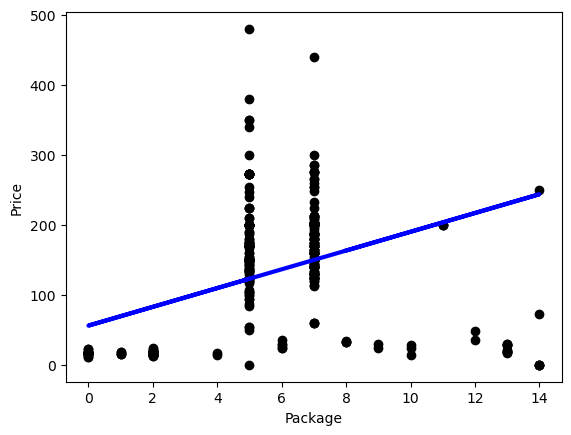

In [57]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)

plt.xlabel('Package')
plt.ylabel('Price')

plt.show()

4. Se prueba el modelo contra una variedad hipotética:

In [58]:
lin_reg.predict( np.array([ [1.75] ]) )

array([[79.81801937]])

Ese número hace sentido, si la lógica de la regresión lineal es cierta.

🎃 Se acaba de crear un modelo que puede ayudara a predecir el precio de unas pocas variedades de calabazas. la parcela de calabazas de días festivos serán hermosas. ¡Pero probablemente puedas crear un mejor modelo!

### Regresión polinómica

Otro tipo de regresión lineal es la regresión polinomial. Mientras algunas veces existe una relación lineal entre las variables - entre más grande el volumen de la calabaza, mayor el precio - algunas veces estas relaciones no pueden ser graficadas como un plano o línea recta.

La regresión polinomial crea una línea curva para ajustar mejor los datos no lineales.

1. Recreemos un dataframe poblado con un segmento de los datos originales de las calabazas:

In [59]:
new_columns = ['Variety', 'Package', 'City', 'Month', 'Price']
poly_pumpkins = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in new_columns], axis='columns')

poly_pumpkins

,Month,Package,Price
0,3,5,275.00
1,4,5,275.00
2,8,5,160.00
3,8,5,160.00
4,10,5,95.00
...,...,...,...
1752,8,4,14.75
1753,8,7,275.00
1754,8,7,275.00
1755,8,7,275.00


Una buena forma de visualizar las correlaciones entre los datos en los dataframes es mostrarlos en una gráfica 'coolwarm':

2. Usa el método Background_gradient()con coolwarmcomo valor de su argumento:

In [60]:
corr = poly_pumpkins.corr()
corr.style.background_gradient(cmap='coolwarm')

,Month,Package,Price
Month,1.000000,-0.117419,-0.139269
Package,-0.117419,1.000000,0.383142
Price,-0.139269,0.383142,1.000000


Viendo esta gráfica, se puede visualizar la buena valoración entre Paquete y Precio. Así que deberías ser capaz de crear un modelo algo mejor que el anterior.

### Crea un oleoducto

Scikit-learn incluye una API útil para crear modelos de regresión polinomail - la API make_pipeline . Se crea un 'pipeline' que es una cadena de estimadores. En este caso, el ducto incluye características polinomiales, o predicciones que forman un camino no lineal.

1. Construye las columnas X e Y:

In [61]:
X=poly_pumpkins.iloc[:,3:4].values
y=poly_pumpkins.iloc[:,4:5].values

2. Crea el pipeline llamando al método make_pipeline():